In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [5]:
"""
    Global variables.
    DATA_FILE -> the file for prediction
"""
DATA_FILE = 'data_for_prediction.csv'

In [6]:
data = pd.read_csv(DATA_FILE)
display(data.head())

,ds,ts,ts_log,ts_log_moving_avg,ts_moving_avg,ts_log_diff,ts_moving_avg_diff,ts_log_moving_avg_diff,ts_log_ewma,ts_log_ewma_diff,trend,seasonal,resid
0,2010-07-04,1.0,0.000000,0.198042,1.285714,-0.693147,-0.285714,-0.198042,0.000000,0.000000,NaN,0.001257,NaN
1,2010-07-05,1.0,0.000000,0.099021,1.142857,0.000000,-0.142857,-0.099021,0.000000,0.000000,NaN,0.075568,NaN
2,2010-07-06,1.0,0.000000,0.099021,1.142857,0.000000,-0.142857,-0.099021,0.000000,0.000000,NaN,0.056422,NaN
3,2010-07-16,2.0,0.693147,0.594126,1.857143,0.000000,0.142857,0.099021,0.199809,0.493339,NaN,0.024812,NaN
4,2010-07-28,1.0,0.000000,0.255966,1.428571,0.000000,-0.428571,-0.255966,0.151569,-0.151569,NaN,-0.030235,NaN


In [12]:
from statsmodels.tsa.arima_model import ARIMA
def run_arima_model(df,ts,p,d,q):
    #Fitting the ARIMA model
    model = ARIMA(df[ts], order=(p,d,q))
    results_ = model.fit(disp=-1)
    
    #Getting the len to calculate RSS
    len_results = len(results_.fittedvalues)
    ts_modified = df[ts][-len_results:]
    
    RSS = sum((results_.fittedvalues-ts_modified)**2)
    RMSE = np.sqrt(RSS / len(df[ts]))
    
    #Plotting
    plt.plot(df[ts],color='blue',label='Original data')
    plt.plot(results_.fittedvalues,color='red',label='Prediction')
    plt.legend(loc='best')
    plt.title(f'ARIMA({p},{d},{q}) - RSS: {RSS} - RMSE: {RMSE}')
    
    plt.show()
    plt.close()
    return results_

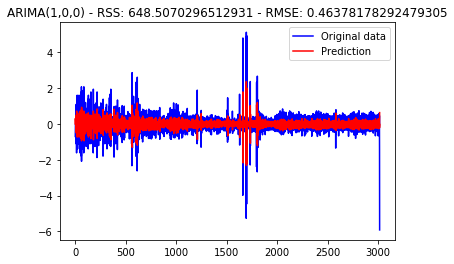

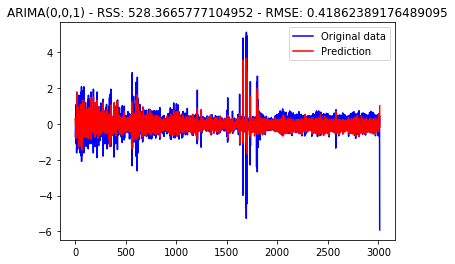

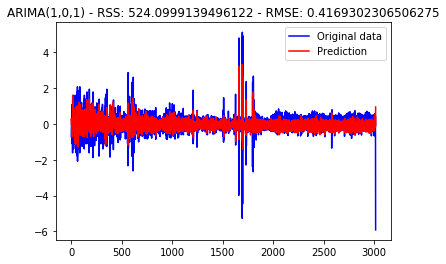

In [13]:
model_AR = run_arima_model(data,'ts_log_diff',1,0,0)

model_MA = run_arima_model(data,'ts_log_diff',0,0,1)

model_ARMA = run_arima_model(data,'ts_log_diff',1,0,1)